# Plotting F1 scores 

In [1]:
library(ggplot2)

In [2]:
# loading in f1_score results
f1_score_path <- file.path("../../../results/2.modeling/all_f1_scores.csv.gz")
f1_df <- read.csv(f1_score_path, sep = ",")

# replacing True and False to shuffled to non shuffled
f1_df$shuffled <- ifelse(f1_df$shuffled == "False", "Not Shuffled", 
                                      ifelse(f1_df$shuffled == "True", "Shuffled", f1_df$shuffled))

# display dimensions
print(dim(f1_df))
head(f1_df)

[1] 160   4


,dataset_type,shuffled,injury_type,f1_score
,<chr>,<chr>,<chr>,<dbl>
1,test,Not Shuffled,Control,0.7936722
2,test,Not Shuffled,Cytoskeletal,0.9417249
3,test,Not Shuffled,Hsp90,0.8432432
4,test,Not Shuffled,Kinase,0.6763848
5,test,Not Shuffled,Genotoxin,0.6801619
6,test,Not Shuffled,Miscellaneous,0.4496644


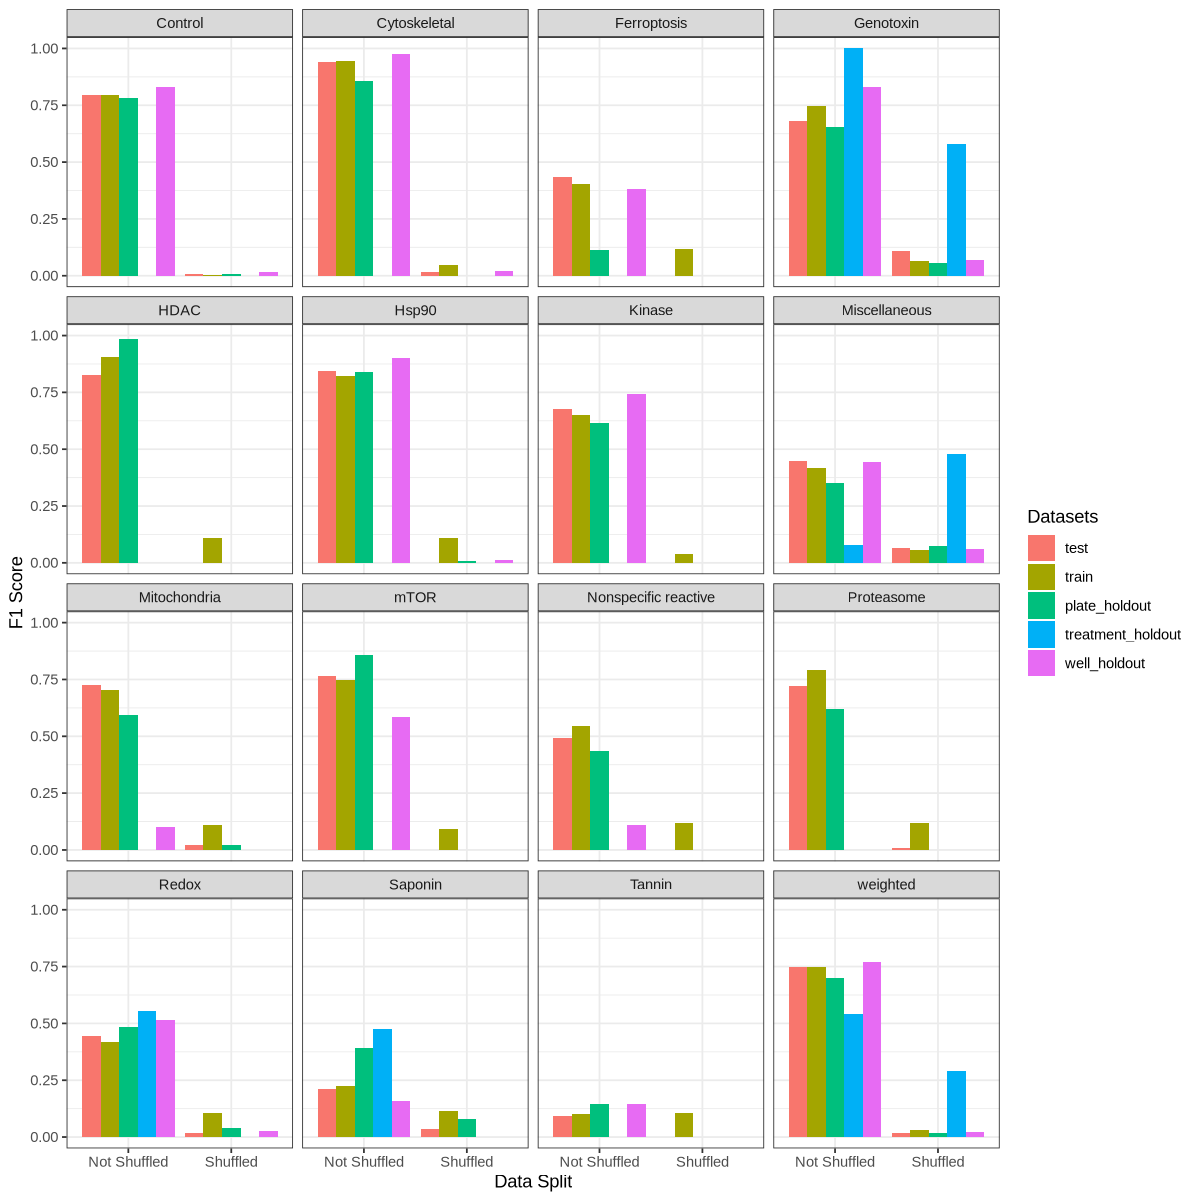

In [3]:
# image size
img_height <- 10
img_width <- 10

options(repr.plot.width = img_width, repr.plot.height = img_height)
# creating a bar plot with a facet grid dictated weather the model has been shuffled or not
# along the y, facet grid was generated based on the dataset type
legend_order <- c("test", "train", "plate_holdout", "treatment_holdout", "well_holdout")

f1_plot <- ggplot(f1_df, aes(x = shuffled, y = f1_score, fill = factor(dataset_type, levels = legend_order))) +
    geom_bar(stat = "identity", position = "dodge") +
    theme_bw() +
    ylim(0, 1) +
    facet_wrap(~injury_type) +
    labs(y = "F1 Score", x = "Data Split", fill = "Datasets")

ggsave(filename = "f1_score_barplots.png", height = img_height, width = img_width, dpi=600)
f1_plot
